In [1]:
%matplotlib inline

In [2]:
from analysis.lib.sim.NVpop_monteCarlo import monteCarlo_repumping as mcr; reload(mcr)

<module 'analysis.lib.sim.NVpop_monteCarlo.monteCarlo_repumping' from 'analysis/lib/sim/NVpop_monteCarlo/monteCarlo_repumping.pyc'>

## Single cycle

Final pops before decay from singlet:  [ 0.047  0.608  0.266  0.079  0.     0.   ]
Final pops after decay from singlet:  [ 0.055  0.616  0.329  0.     0.     0.   ]
params:  [   0.324   -0.31   298.073]


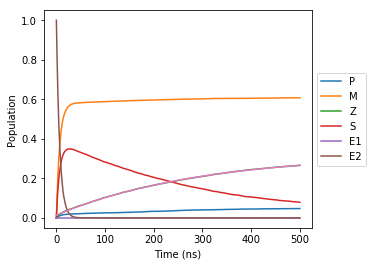

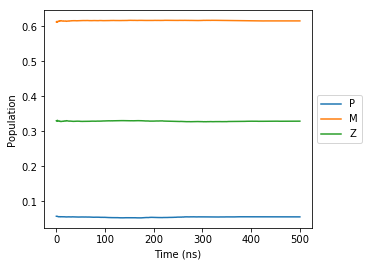

In [11]:
reload(mcr);

rmc = mcr.repumpingMonteCarlo()

rmc.extra_singlet_state = False

rmc.drive = 0
rmc.init_state = 5
rmc.S_lifetime = 300.0

rmc.drive_branching = mcr.normalized([1,0])
E1_branching_raw = np.array([1.0,0.00,0.0,0.63,0.0,0.0])
E2_branching_raw = np.array([0.03,0.936,0.034,0.63,0.0,0.0])
rmc.E1_branching = mcr.normalized(E1_branching_raw)
rmc.E2_branching = mcr.normalized(E2_branching_raw)
rmc.E1_lifetime = 11.7/np.sum(E1_branching_raw)
rmc.E2_lifetime = 11.7/np.sum(E2_branching_raw)
rmc.S_branching = mcr.normalized([1,1,8,0,0,0])

rmc.time_duration = 500
rmc.dt = 0.5
rmc.repetitions = 10000

rmc.run(print_end_pops = True,log_plot=False,do_fit='before_decay',invert_Z = False)
    

## Hold in singlet state

In [12]:
Apar = np.array([-365,-26,-55,33,26.5,-72])*1e3
Aperp = np.array([100,18,25,35,30,30])*1e3
Larmor = 442800.0

fp1 = (np.sqrt((Larmor + Apar)**2 + Aperp**2) - Larmor)
fm1 = (np.sqrt((Larmor - Apar)**2 + Aperp**2) - Larmor)
favg = (fp1+fm1)/2

print 'Freq ms=+1: ', np.around(fp1,0)
print 'Freq ms=-1: ',  np.around(fm1,0)
print 'Avg freq: ', np.around(favg,0)

print 'Phase acquired per mus: ', 360*favg*1e-6

Freq ms=+1:  [-316100.  -25612.  -54195.   34286.   27458.  -70788.]
Freq ms=-1:  [ 371166.   26345.   55627.  -31508.  -25420.   72873.]
Avg freq:  [ 27533.    367.    716.   1389.   1019.   1042.]
Phase acquired per mus:  [ 9.91186558  0.13210748  0.25782463  0.49994724  0.36674079  0.37529959]


## Repumping

Final pops before decay from singlet:  [ 0.     0.     0.994  0.003  0.     0.     0.003]
Final pops after decay from singlet:  [ 0.001  0.001  0.998  0.     0.     0.     0.   ]


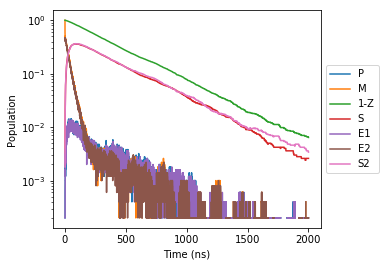

t1,t2:  36.0 380.0
relative rate of exp decays:  3.3


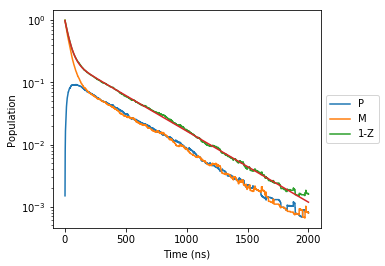

In [55]:
reload(mcr);

rmc = mcr.repumpingMonteCarlo()

rmc.extra_singlet_state = True

rmc.drive = 2
rmc.init_state = 1
rmc.S_lifetime = 300.0

rmc.drive_branching = mcr.normalized([1,0])
E1_branching_raw = np.array([1.0,0.00,0.0,0.63,0.0,0.0])
E2_branching_raw = np.array([0.03,0.936,0.034,0.63,0.0,0.0])
rmc.E1_branching = mcr.normalized(E1_branching_raw)
rmc.E2_branching = mcr.normalized(E2_branching_raw)
rmc.E1_lifetime = 11.7/np.sum(E1_branching_raw)
rmc.E2_lifetime = 11.7/np.sum(E2_branching_raw)
rmc.S_branching = mcr.normalized([1,1,8,0,0,0])

rmc.time_duration = 2000
rmc.dt = 0.2
rmc.repetitions = 5000

rmc.run(print_end_pops = True,log_plot=True,do_fit='after_decay',invert_Z = True)
    

In [56]:
avgRepumpTime=np.sum(rmc.t_array[:-1]*(-np.diff(rmc.mean_populations[:,3])))

print avgRepumpTime

167.58716


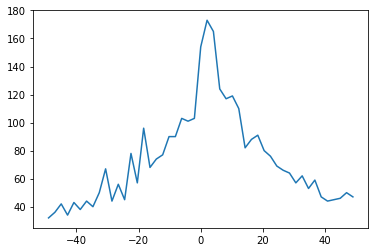

Mean phase, std dev phase:  8.26 57.56
Time in ms=-1 required to acquire mean phase (ns):  61.79

 Only singlet


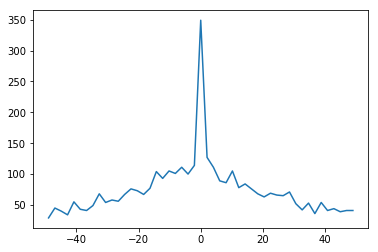

Mean phase, std dev phase:  3.97 57.31
Time in ms=-1 required to acquire mean phase (ns):  29.68


In [60]:
Apar = np.array([-365,-26,-55,33,26.5,-72])*1e3
Aperp = np.array([100,18,25,35,30,30])*1e3
Larmor = 442800.0

fp1 = (np.sqrt((Larmor + Apar)**2 + Aperp**2) - Larmor)
fm1 = (np.sqrt((Larmor - Apar)**2 + Aperp**2) - Larmor)
favg = (fp1+fm1)/2

carbon = 0

wp1=360.0*1e-9*fp1[carbon]
wm1=360.0*1e-9*fm1[carbon]

phase = np.float(rmc.dt)*np.array([wp1,wm1,0,wp1,wp1,wm1,wm1])
phaseAcquired = np.sum(np.dot(phase,np.transpose(rmc.populations,axes = [0,2,1])),axis=1)

h,bins =np.histogram(phaseAcquired,np.linspace(-50,50,50))
centers = bins[:-1] + (bins[1]-bins[0])/2

plt.plot(centers,h)
plt.show()
plt.close()

meanPhase = np.mean(phaseAcquired)
stdDevPhase = np.sqrt(np.var(phaseAcquired))

print 'Mean phase, std dev phase: ', np.around(meanPhase,2), np.around(stdDevPhase,2)
print 'Time in ms=-1 required to acquire mean phase (ns): ', np.around(meanPhase/wm1,2)

print '\n Only singlet'

wp1=360.0*1e-9*fp1[carbon]
wm1=360.0*1e-9*fm1[carbon]

phase = np.float(rmc.dt)*np.array([0,0,0,wp1,0,0,wm1])
phaseAcquired = np.sum(np.dot(phase,np.transpose(rmc.populations,axes = [0,2,1])),axis=1)

h,bins =np.histogram(phaseAcquired,np.linspace(-50,50,50))
centers = bins[:-1] + (bins[1]-bins[0])/2

plt.plot(centers,h)
plt.show()
plt.close()

meanPhase = np.mean(phaseAcquired)
stdDevPhase = np.sqrt(np.var(phaseAcquired))

print 'Mean phase, std dev phase: ', np.around(meanPhase,2), np.around(stdDevPhase,2)
print 'Time in ms=-1 required to acquire mean phase (ns): ', np.around(meanPhase/wm1,2)

In [47]:
favg*360*300e-9

array([ 2.97355968,  0.03963224,  0.07734739,  0.14998417,  0.11002224,
        0.11258988])

In [48]:
360*np.sqrt(0.5*(fp1)**2 + 0.5*(fm1)**2 - favg**2)*300e-9

array([ 37.11238099,   2.80567483,   5.93040823,   3.55285726,
         2.85543068,   7.7577357 ])

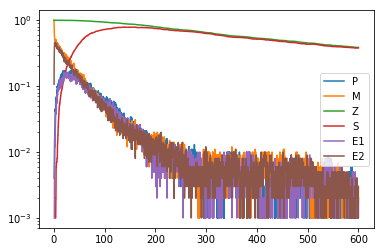

t1,t2:  58.0 659.0
relative rate of exp decays:  3.86


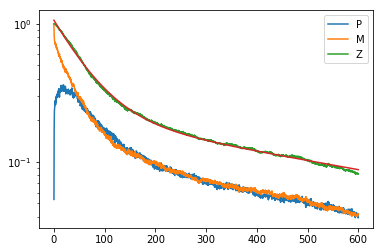

In [30]:
drive = 1
S_lifetime = 440.0


drive_branching = mcr.normalized([0.5,0.5])
A1_branching_raw = np.array([0.5,0.5,0.0,1.4,0.0,0.0])
A2_branching_raw = np.array([0.5,0.5,0.0,0.0,0.0,0.0])
A1_branching = mcr.normalized(A1_branching_raw)
A2_branching = mcr.normalized(A2_branching_raw)
E1_lifetime = 12/np.sum(A1_branching_raw)
E2_lifetime = 12/np.sum(A2_branching_raw)

time_duration = 600
dt = 0.1
repetitions = 1000

t_array,populations,mean_populations = mcr.run_mc(time_duration,dt,repetitions,
                                                  S_branching = S_branching,
                                                  E1_branching = A1_branching,
                                                  E2_branching = A2_branching,
                                                  drive = drive)